# Churn Analysis Müşteri Kaybı Tahminlemesi

# Problemin Anlaşılması

Şirketi terk edecek olan müşterileri makine öğrenmesi modeli geliştirerek önceden tahmin edeilir miyiz? 

**Churn**: Varolan müşterilerin kaybı.Müşterinin banka hesabını kapatması.

**Neden yapıyoruz?**

- Var olan müşterileri elde tutmak, yeni müşterileri elde etmeye göre hem daha kolay hem daha az maliyetli

- Müşteri kaybı ciro ve marka imajına etkiliyor

- Müşterileri kaybetmeyerek diğer firmaların müşteri kapmalarının önüne geçebiliriz. 

- Müşterilerin geçmiş datalarını inceleyerek daha iyi tanıyarak bu kayıpların önüne geçebiliriz. Ayrıca, hizmet kalitemizi de artırmış oluruz


**Değişkenlerimiz**

- CustomerId: Müşteri numarası. Tekil bir değer olur 

- Surname: Soyisim

- CreditScore: Kredi Skoru

- Geography: Ülke

- Gender: Cinsiyet

- Age: Yaş

- Tenure: Kaç yıldır müşteri

- Balance: Bakiye

- NumOfProducts: Kullanılan banka ürün sayısı

- HasCrCard: Kredi Kartı Statusu (0 = No, 1 = Yes)

- IsActiveMember: Aktif üye durumu  (0 = No, 1 = Yes)

- EstimatedSalary: Yıllık kazanç

- **Exited: Churn mü değil mi?  (0 = No, 1 = Yes)**


Referans gösterilen dataseti kaggle sitesidendir
https://www.kaggle.com/mathchi/churn-for-bank-customers/notebooks

# Metot

**1- Business case’i anlamak**

- Doğru sonuca ulaşmak için  istediğimiz soruyu iyi anlamalıyız 

**2- Data toplama, temizleme, EDA keşifsel veri analizi**

- Tahminleyeceğimiz modelin doğruluğu verisetimizin kalitesiyle doğru orantılı. 

**3- Değişken seçimi**

- Modellemeye koyacağımız değişkenleri seçiyoruz.

**4- Modelleme**

- Modelleme aşamasında veri setimiz üzerinde algoritmalar çalıştırıp hangisinin daha doğru sonuçlar verdiğini karşılaştırıyoruz.

**5- Sonuçlar ve Çözümler**

- Tahminlemeyi yaptıktann sonra business açısından hangi adımları atmamız gerektiğini buluyoruz. 


### 1. Kütüphanelerin yüklenmesi ve data'nın alınması

In [1]:
#Python kütüphanelerinin tanımlanması
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# Data'nın read_csv ile alınması ve ilk 5 satır incelemesi
dataset = pd.read_csv(r'C:\Users\Arman Zamani\Documents\churn.csv')
dataset.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 2. Keşifsel Veri Analizi

In [16]:
dataset.tail()
# Son 5 satır incelemesi

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [8]:
dataset.describe()
# Data'nın betimsel incelenmesi

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


- Baktığımız zaman müşteriler ortalama olarak 100 bin kazanıyorlar.

- Yaş ortalamaları 38.9. En az yaş 18. Maksimum yaş ise 92.

- Kredi skoru ortalamaları 650

- Ortalama 5 yıldır müşterimizler

In [17]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [19]:
# Data'nın büyüklüğü. 14 özelliği olan 1000 müşteri olarak düşünebiliriz.
dataset.shape

(10000, 14)

In [571]:
# Data tiplerine bakılması
dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### 3. Data Cleaning

*Datamızı sağlıklı analiz edebilmemiz için temizlememiz gerekiyor*

*Hangi değişkenleri modellemeye sokacağımıza karar vermeliyiz*

*Ayrıca olmayan değerler var mı veya uygun olmayan data tipleri var mı kontrol etmeliyiz.*

In [20]:
dataset_new = dataset.drop(columns=["RowNumber","CustomerId","Surname"])


RowNumber, CustomerId, Surname modelleme için önem teşkil etmediği için çıkartıyoruz

In [21]:
dataset_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
dataset_new.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [23]:
# Eksik veri var mı yok mu
dataset_new.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

- Eksik veri gözükmüyor

In [24]:
# her değişkenin unique sayısına bakılması
dataset_new.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [94]:
# numerik değişkenler arasndaki korelasyonun incelenmesi
dataset_new.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


### 4. Data visualization

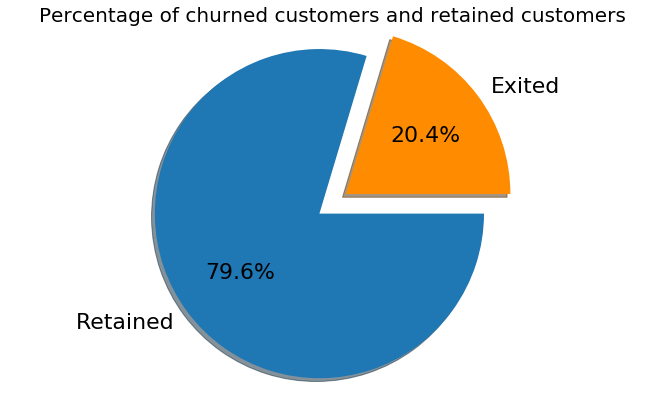

In [93]:
# churn edenlerin toplam müşteri sayısına oranını piechart'ta gösterimi
labels = 'Exited', 'Retained'
plt.rcParams['font.size'] = 22
sizes = [dataset_new.Exited[dataset_new['Exited']==1].count(), dataset_new.Exited[dataset_new['Exited']==0].count()]
explode = (0, 0.2)
colors = ['darkorange','tab:blue','#99ff99','#ffcc99']
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',shadow=True, startangle=0)
plt.title("Percentage of churned customers and retained customers", size = 20)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

- Müşterilerin yüzde **20.4**'ü churn etmiş, yüzde **79,6** kalmış.

Text(0.5, 1.0, 'Estimated Salary of Customers Distribution of Churn (Exited)')

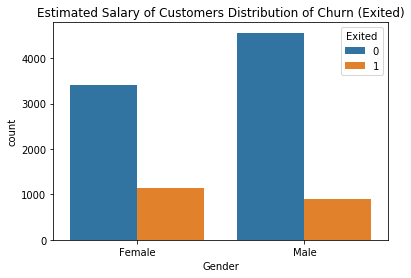

In [36]:
import seaborn as sns
sns.countplot(x='Gender', hue='Exited',linewidth=10,data=dataset_new)
plt.title("Churn rate by Gender (Exited)")

- Kadın müşterilerimizden çok erkek müşteriler mevcut ama churn olarak kayda değer bir fark görünmüyor.

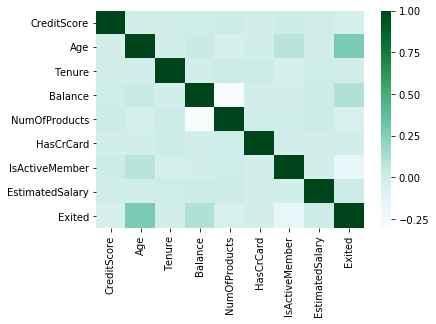

In [43]:
#seaborn heatmap kullanarak özellikler arasındaki bağlantıyı detaylı bir şekilde inceliyoruz.
#Renk koyulaştıkça korelasyon artıyor. Renk azaldıkça negatif korelasyon artıyor
dataset_new.corr()
sns.heatmap(dataset_new.corr(),cmap="BuGn")

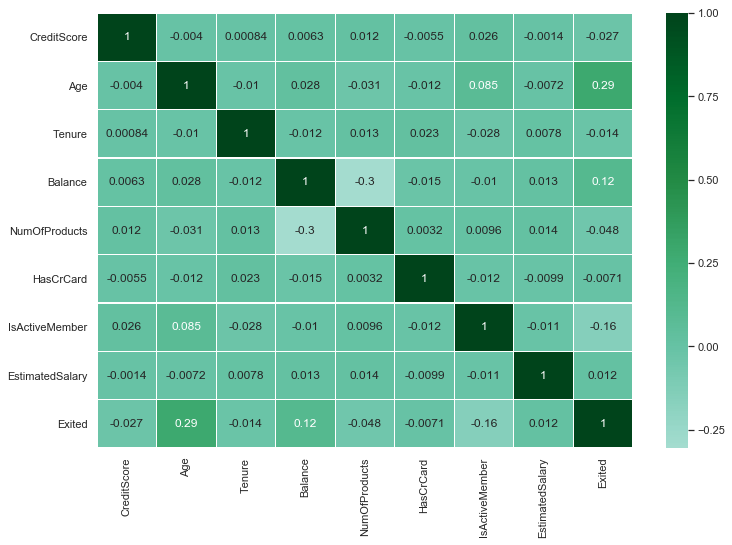

In [105]:
sns.set()
corr = dataset_new.corr()
plt.figure(figsize = (12,8))
ax = sns.heatmap(corr
                 ,center=0
                 ,annot=True
                 ,linewidths=0.2
                 ,cmap="BuGn")
plt.show()

- Değişkenler arasında göze çarpan bir korelasyon gözükmüyor. 0.5'in altındadalar. Çıkarmamıza gerek yok.
- Yaş ile exited arasında korelasyon göze çarpıyor. Yaş artıkça churn olma olasılığı artıyor olabilir.
- Balance ve NumOfProducts arasında hafif negatif korelasyon var.

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


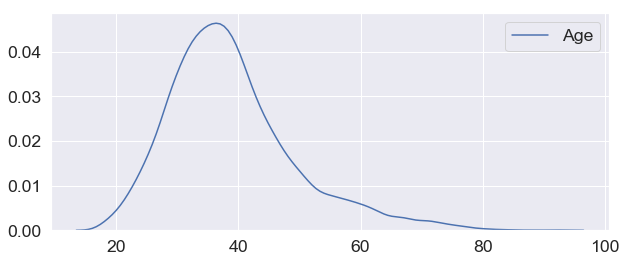

In [575]:
#Yaş dağılımı 
plt.figure(figsize=(10,4))
sns.kdeplot(dataset_new["Age"])

C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


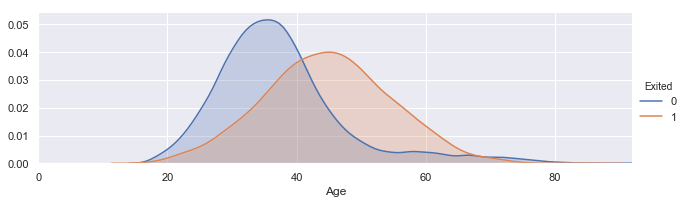

In [132]:
facet = sns.FacetGrid(dataset_new, hue = "Exited", aspect = 3)
facet.map(sns.kdeplot, "Age", shade = True)
facet.set(xlim = (0, dataset_new["Age"].max()))
facet.add_legend()
plt.show()

- Churn olan müşterilerin yaş ortalaması daha yüksek. Yaş artıkça churn olma olasılığı artıyor.

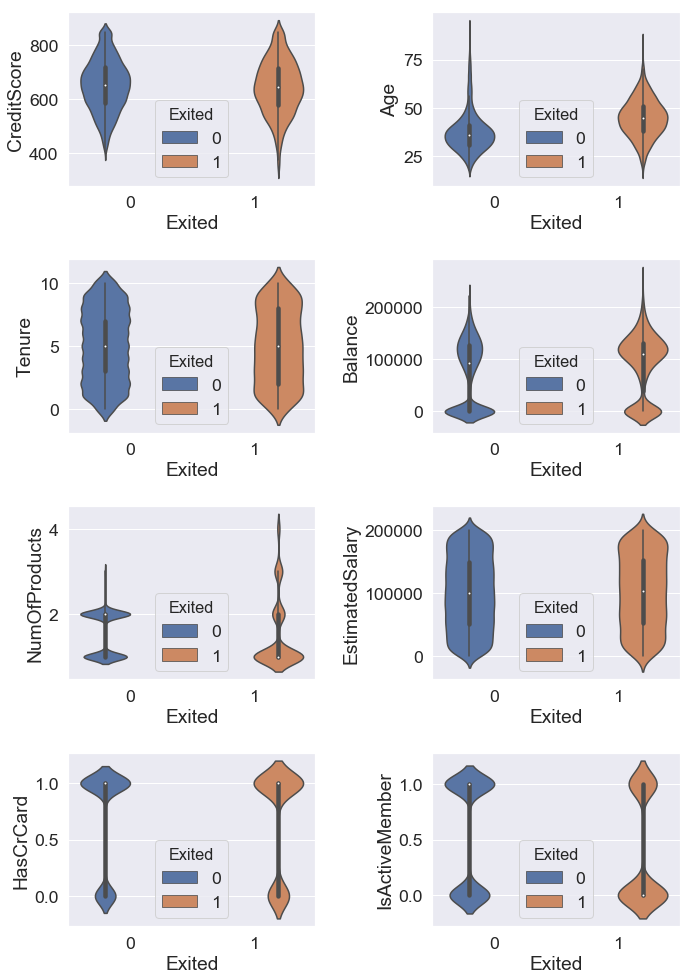

In [581]:
# Değişkenlerin incelenmesi
fig, axarr = plt.subplots(4, 2, figsize=(10, 14))
sns.violinplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = dataset_new, ax=axarr[0][0])
sns.violinplot(y='Age',x = 'Exited', hue = 'Exited',data = dataset_new , ax=axarr[0][1])
sns.violinplot(y='Tenure',x = 'Exited', hue = 'Exited',data = dataset_new, ax=axarr[1][0])
sns.violinplot(y='Balance',x = 'Exited', hue = 'Exited',data = dataset_new, ax=axarr[1][1])
sns.violinplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = dataset_new, ax=axarr[2][0])
sns.violinplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = dataset_new, ax=axarr[2][1])
sns.violinplot(y='HasCrCard',x = 'Exited', hue = 'Exited',data = dataset_new, ax=axarr[3][0])
sns.violinplot(y='IsActiveMember',x = 'Exited', hue = 'Exited',data = dataset_new, ax=axarr[3][1])
plt.tight_layout()

- Churn olan müşterilerin Kredi Skor ortalamaları daha az ve yaşları daha yüksek olarak yorumlanabilir.
- Daha çok ürüne sahip olan müşterilerin bağlılığı daha az olabilir.
- Churn müşterilerin Balance değeri daha yüksek

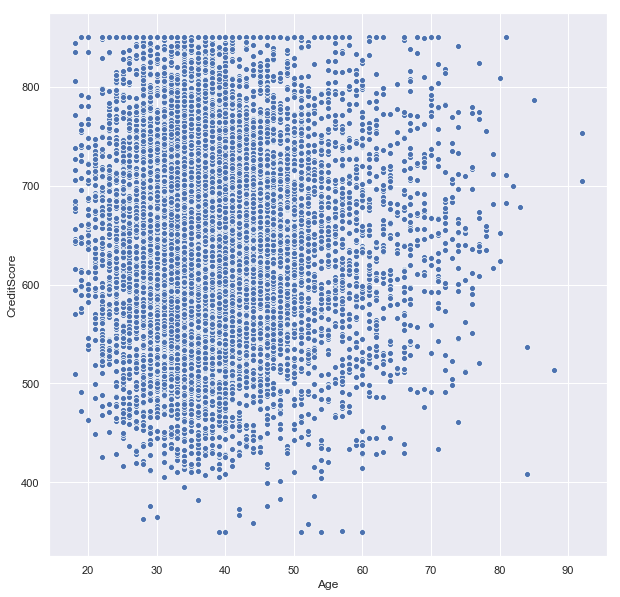

In [172]:
#yaş ve kredi skorlarının incelenmesi 
plt.figure(figsize=(10,10))
sns.scatterplot(x="Age", y="CreditScore", data=dataset_new)

- Yaş ve kredi skoru arasında linear bir ilişki gözükmüyor.

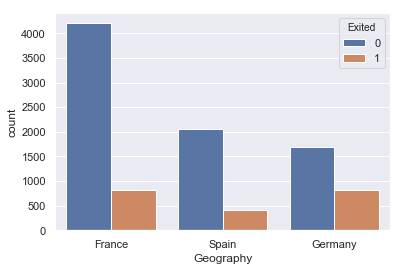

In [130]:
sns.countplot(x = 'Geography', hue = 'Exited',data = dataset_new)
plt.show()

- Ülkelere göre incelediğimiz zaman müşteriler Fransa'da daha fazladır
- Almanya'da oransal olarak daha çok churn var.

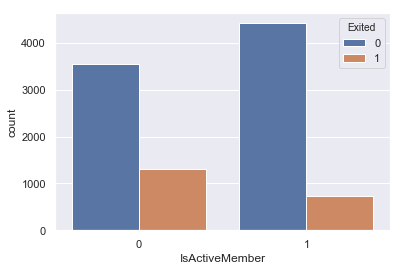

In [124]:
sns.countplot(x = 'IsActiveMember', hue = 'Exited',data = dataset_new)

- Active müşterilerde churn daha az

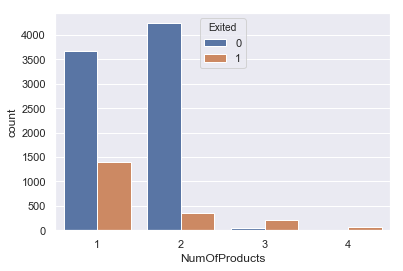

In [125]:
sns.countplot(x = 'NumOfProducts', hue = 'Exited',data = dataset_new)

- Müşterilerin ürün sayısı artıkça Churn olma ihtimali artmış

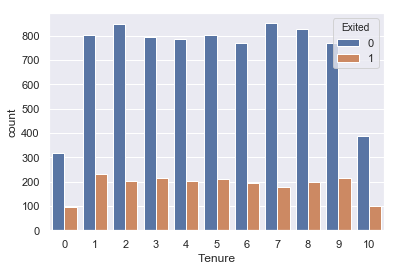

In [126]:
sns.countplot(x = 'Tenure', hue = 'Exited',data = dataset_new)

- Geçirilen yıllar churn açısından gözle görünür farklar yaratmamış.

In [303]:
dataset_new.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# 5. Modelleme

###  Split Train and Test Set

- Target variable olarak churn geriye kalanları ise features olarak oluşturuyoruz.

In [405]:
X = dataset_new[["CreditScore", "Geography", "Gender", "Age", 'NumOfProducts', 'HasCrCard', 'IsActiveMember', "EstimatedSalary"]].values
y=dataset_new[["Exited"]]

- Veri setini train ve test olarak iki parçaya ayırıyoruz. 
- Yüzde 80'ini eğitim yüzde 20'sini ise test için kullanacağız.
- Amacımız modeli training dataseti ile çalıştırmak ve tahminlemeyi test dataseti ile test etmek.
- Eğer böyle yapmasaydık sadece doğru tahminler olacağı için yeni datayı modelimiz öğrenemeyecekti 

In [348]:
# Train ve test datası olarak ayırıyoruz
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=3)

- Algoritmaların problemsiz bir şekilde çalışması için veri dönüşümü yapmak gerekiyor. 
- Coğrafya(Geography) ve Cinsiyet (Gender) kategorik verilerini LabelEncoder() kullanarak numeric değere çeviriyoruz.

In [347]:
## Kategorik değerleri sayıya çeviriyoruz
from sklearn import preprocessing
geography=preprocessing.LabelEncoder()
geography.fit(["France", "Spain", "Germany"])
X[:,1]=geography.transform(X[:,1])

gender = preprocessing.LabelEncoder()
gender.fit(["Female", "Male"])
X[:,2]=gender.transform(X[:,2])

## 6. Makine Öğrenme Modellerinin Çalıştırılması

**Model Yapımı**

- Müşteri churn tahminleme modeli yaparak genel olarak şu şekilde ilerleyeceğiz.

- İlk olarak kullanacağımız algroitmaları , indirdiğimiz kütüphanelerden  çağıracağımız fonksiyonlarlı kullanıp oobject olarak yaratcağız.

- Bu analizde temel sınıflandırma modellerinden Logistic Regression, Decision Tree ve kollektif sınıflandırma modellernden RandomForrest kullancağız.

- Trainseti kullanarak modeli fit edeceğiz. **fit()** kullanarak.

- Test seti üzerinden ise tahminlemeyei yapıyoruz. **predict()** kullanarak.



**Model Değerlendirilmesi**

- Her modelin accuracy ölçütüne göre başarıyı buluyoruz. 

- Model bir tahmin yapıyorsa ne kadar sıklıkla doğru tahmin yapıyor diyebiliriz.

- Sonrasında tahminimizin ne kadar doğru olduğunu anlamak adına Confusion Matrix ile tahminimiz ne kadar doğru anlayabilriz.

- Precision, sonuçlarımızın yüzde kaçının doğru olduğunu, recall ise toplu doğrularımızın ne kadarının algoritmalarımız tarafından doğru sınıflandığını gösteriyor.

- Precision, modelimiz ne kadar kusursuz onu gösteriyor. Model bir tahmin yapıyorsa ne kadar sıklıkla doğru tahmin yapıyor diyebiliriz. Tahmin edilen churnlerin gerçekte ne kadarının churn olduğunu gösterir.

- Recall, churn olanların ne kadarını doğru tahmin ettiğimizi gösterir.

- Precision, sonuçlarımızın yüzde kaçının doğru olduğunu, recall ise toplu doğrularımızın ne kadarının algoritmalarımız tarafından doğru sınıflandığını gösteriyor.

In [377]:
# Lojistik Regresyon - Logistic Regression
logr = LogisticRegression()
logr.fit(X_trainset,y_trainset)
y_pred_logr = logr.predict(X_testset)
logr_acc = accuracy_score(y_testset ,y_pred_logr)
print("Accuracy score of Logistic Regression: ", logr_acc)

Accuracy score of Logistic Regression:  0.798


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [493]:
logr_confus_matrix = metrics.confusion_matrix(y_testset, y_pred_logr)
logr_classification_report = metrics.classification_report(y_testset, y_pred_logr)

In [494]:
print(logr_confus_matrix) 
print(logr_classification_report)

[[1588   17]
 [ 387    8]]
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      1605
           1       0.32      0.02      0.04       395

   micro avg       0.80      0.80      0.80      2000
   macro avg       0.56      0.50      0.46      2000
weighted avg       0.71      0.80      0.72      2000



**Logistic Regresyon**

Precision: **0.71**

Recall: **0.80**

f1-score: **0.72**

In [379]:
# Karar Ağacı - Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_trainset,y_trainset)
y_pred_dtc = dtc.predict(X_testset)
dtc_acc = accuracy_score(y_testset ,y_pred_dtc)
print("Accuracy score of DecisionTreeClassifier: ",dtc_acc)

Accuracy score of DecisionTreeClassifier:  0.7725


In [496]:
dtc_confus_matrix = metrics.confusion_matrix(y_testset, y_pred_dtc)
dtc_classification_report = metrics.classification_report(y_testset, y_pred_dtc)
print(dtc_confus_matrix) 
print(dtc_classification_report)

[[1367  238]
 [ 217  178]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1605
           1       0.43      0.45      0.44       395

   micro avg       0.77      0.77      0.77      2000
   macro avg       0.65      0.65      0.65      2000
weighted avg       0.78      0.77      0.77      2000



**Decision Tree** 

Precision: **0.78**

Recall: **0.77**

f1-score: **0.77**

In [592]:
# Rassal Ağaçlar - Random Forrest
rfc = RandomForestClassifier()
rfc.fit(X_trainset,y_trainset)
y_pred_rfc = rfc.predict(X_testset)
rfc_acc = accuracy_score(y_testset,y_pred_rfc)
print("Accuracy score of RandomForestClassifier: ",rfc_acc)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy score of RandomForestClassifier:  0.8445


In [598]:
# model karşılaştırması
models = pd.DataFrame({
  'Model': ['Logistic', 'Decision Tree', 'Random Forest'],
  'Accuracy' : [logr_acc, dtc_acc, rfc_acc]
})

models.set_index('Model', inplace=True)
models.sort_values(by='Accuracy', ascending=False)

,Accuracy
Model,
Random Forest,0.8445
Logistic,0.7980
Decision Tree,0.7725


Random Forest algoritmasının **0.8445** ile en isabetli sonucu verdiğine ulaştık.

In [497]:
rfc_confus_matrix = metrics.confusion_matrix(y_testset, y_pred_rfc)
rfc_classification_report = metrics.classification_report(y_testset, y_pred_rfc)
print(rfc_confus_matrix) 
print(rfc_classification_report)

[[1531   74]
 [ 233  162]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1605
           1       0.69      0.41      0.51       395

   micro avg       0.85      0.85      0.85      2000
   macro avg       0.78      0.68      0.71      2000
weighted avg       0.83      0.85      0.83      2000



**Random Forest** 

Precision: **0.83**

Recall: **0.85**

f1-score: **0.83**

In [559]:
models = pd.DataFrame({"Algorithm":['Random Forest', 'Decision Tree Classifier', 'Logistic Regression'],
  'Accuracy Mean': [RandomForestClassifier_cv.mean(),DecisionTreeClassifier_cv.mean(),LogisticRegression_cv.mean()],
  'Accuracy Std' : [RandomForestClassifier.cv.std(),DecisionTreeClassifier_cv.std(),LogisticRegression_cv.std()],
})

models.set_index('Algorithm', inplace=True)
models.sort_values(by='Accuracy Std', ascending=False)

,Accuracy Mean,Accuracy Std
Algorithm,,
Decision Tree Classifier,0.776542,0.023300
Random Forest,0.840539,0.022805
Logistic Regression,0.798020,0.005650


In [370]:
pred = pd.DataFrame(y_pred_rfc)
pred.head()

,0
0,0
1,0
2,1
3,0
4,0


In [417]:
## Confusion Matrice
print("True Positive : ", conf_mat[1, 1])
print("True Negative : ", conf_mat[0, 0])
print("False Positive: ", conf_mat[0, 1])
print("False Negative: ", conf_mat[1, 0])

True Positive :  162
True Negative :  1531
False Positive:  74
False Negative:  233


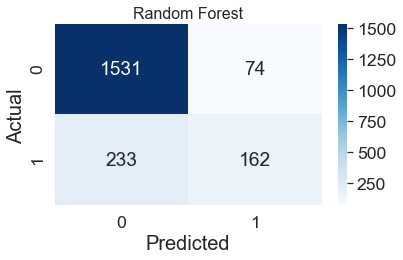

In [464]:
sns.set_style('whitegrid')
sns.set(font_scale=1.6,font='sans-serif', style='darkgrid')
sns.heatmap(conf_mat,annot = True,fmt ='d',cmap="Blues")
title = 'Random Forest'
plt.title(title,fontdict={'size':'16'})
plt.ylabel('Actual',fontdict={'size':'20'})
plt.xlabel('Predicted',fontdict={'size':'20'})
plt.tight_layout()

- **1531** True Negatives, **74** False Positives, **233** False Negatives, **162** True Positives

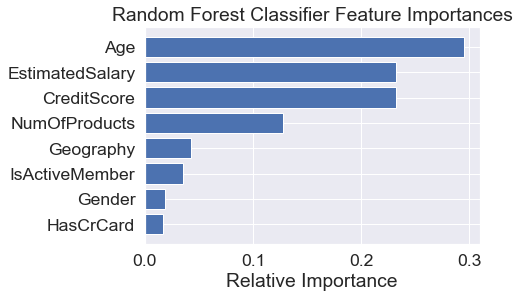

In [468]:
rfc.features = rfc.feature_importances_
indices_rfc = np.argsort(rfc.features)
features = dataset_new[["CreditScore", "Geography", "Gender", "Age", 'NumOfProducts', 'HasCrCard', 'IsActiveMember', "EstimatedSalary"]].columns
plt.title('Random Forest Classifier Feature Importances')
plt.barh(range(len(indices_rfc)), rfc.features[indices_rfc], color='b', align='center')
plt.yticks(range(len(indices_rfc)), [features[i] for i in indices_rfc])
plt.xlabel('Relative Importance')
plt.show()

- Değişkenlerin modele etkisine baktığımızda Age, EstimatedSalary veCreditScore ön plana çıkıyor.

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


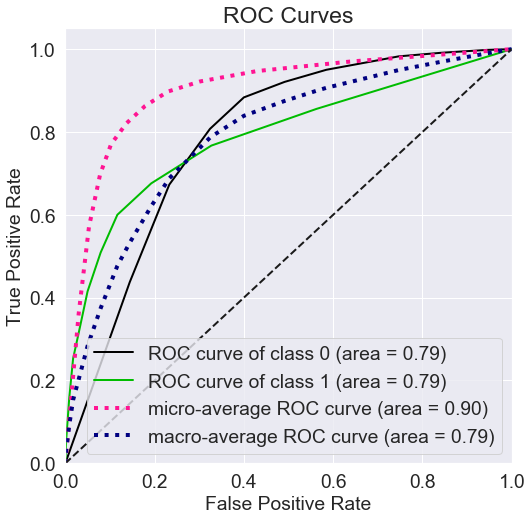

In [602]:
import scikitplot as skplt
y_pred_proba = rfc.predict_proba(X_testset)
skplt.metrics.plot_roc_curve(y_testset, y_pred_proba, figsize=(8,8))

## Özet

- Modelleme adımlarını ve makine öğrenmesi algortimalarını kullanarak müşteri kaybını tahminlemeye çalıştık.

- Kullandığımız 3 model arasında en iyi sonucu **0.8445** accuracy ile **Random Forest** verdi.

- **0.798** accuracy ile Logistic Regression 2., **0.7725** accuarcy ile  DecisionTreeClassifier 3.

- Confusion matrix'e baktığımız zaman precision olarak 1.RFC, 2. DTC, 3. LR.

Logistic Regresyon Precision: 0.71 Recall: 0.80 f1-score: 0.72

Decision Tree      Precision: 0.78 Recall: 0.77 f1-score: 0.77

Random Forest      Precision: 0.83  Recall: 0.85f1-score: 0.83


- Yaşça büyük grupta ve aktif olan müşteriler daha çok churn olmuş.

- Kredi skoru daha düşük olan grubun ayrılma oranı da fazla bulduk.

- 2'den özle ürün kullanan müşterilerin churn olma olasılığı daha fazla.

Hem potansiyel churn müşterilini saptadık hem de hangi değişkenlerin önemli rol oynadığını bulduk. Bu veriler ışığında CRM ekibi müşteri kaybını önlemek adına çalışmalar yapabilir ve şirketin zarar etmesinin önüne geçebilir. Ayrıca, müşterilerin yaşadıkları deneyimlerin kalitesini artırabilirler.
